#### **1. Importing Required Package and Modules**

Installation of the necessary modules.

In [ ]:
%pip install seaborn
%pip install scikit-learn
%pip install matplotlib
%pip install aisp

In [1]:
# Importing the negative selection.
from aisp.NSA import RNSA

# Importing other packages. 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

#### **2. Function to normalize data between 0 and 1**

In [2]:
# function to normalize the data using functions from scikit-learn.
def normalize_data(dados):
    scaler = MinMaxScaler().fit(dados)
    return scaler.transform(dados)

#### **3. Load the database using the seaborn package.**

Loading the "iris" dataset using the Seaborn library. The iris dataset comprises four floral characteristics, namely the size and width of the sepals and petals. Consequently, there are three output varieties for these samples: setosa, versicolor, and virginica.

This dataset is also available at the following links: [kaggle](https://www.kaggle.com/datasets/uciml/iris) and [UCIML](http://archive.ics.uci.edu/dataset/53/iris).

Fisher,R. A.. (1988). Iris. UCI Machine Learning Repository. https://doi.org/10.24432/C56C76.

In [3]:
amostrasName = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
iris = sns.load_dataset('iris')
dados = np.array(iris.get(amostrasName))
classes = np.array(iris.get('species'))

#### **4. Preprocessing (Scale of inputs [0, 1])**

##### **4.1 Separation of training and testing (30% for testing)**

Cell responsible for normalizing the data to values between 0 and 1 and for separating the training and testing sets.

In [4]:
# Normalizing the data between 0 and 1
dados = normalize_data(dados)
# Generating the training and testing sets.
train_x, test_x, train_y, test_y = train_test_split(dados, classes, test_size=0.3)

# RNSA Fixed Radius

#### **5. Cross Validation.**

Model performance is evaluated through cross-validation. In each iteration, 10% of the training data is reserved for testing.

In [5]:
accuracy_list = list()

# Model Initialization
nsa = RNSA(N=350, r=0.35)
for i in range(0, 50):
    # Split the training set, setting aside 1/10 of the data for validation.
    train_model_x, valid_x, train__model_y, valid_y = train_test_split(train_x, train_y, test_size=0.1)

    # Fit the model using the other 90% of the data
    nsa.fit(train_model_x, train__model_y, verbose=False)

    # Accuracy calculation for validation set:
    prev_y = nsa.predict(valid_x)
    accuracy_list.append(accuracy_score(prev_y, valid_y))

# Display the mean accuracy and its standard deviation
print(f"The average accuracy is: {np.average(np.array(accuracy_list)):.6f}")
print(f"Standard deviation of accuracies: {np.std(np.array(accuracy_list)):.6f}")

The average accuracy is: 0.890909
Standard deviation of accuracies: 0.092709


**6. Fitting the model using the training set in its entirety**

In [6]:
# Creating the model with all data separated for training.
nsa.fit(train_x, train_y)
print('Model Total Adjusted!')

✔ Non-self detectors for classes (setosa, versicolor, virginica) successfully generated:  ┇██████████┇ 1050/1050 detectors

Model Total Adjusted!


**7. Display report and confusion matrix for test set**

The accuracy is 0.9555555555555556
              precision    recall  f1-score   support

      setosa       1.00      0.94      0.97        16
  versicolor       0.88      1.00      0.93        14
   virginica       1.00      0.93      0.97        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



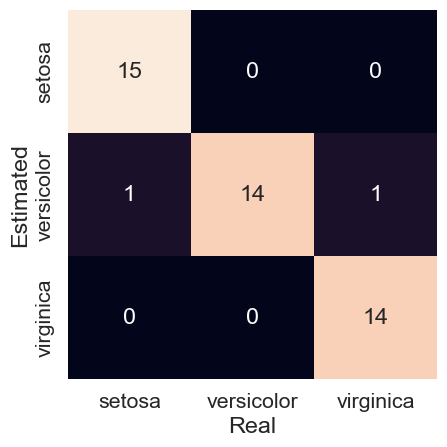

In [7]:
# Previewing classes with test samples.
prev_y = nsa.predict(test_x)
# Showing the accuracy of predictions for actual data.
print(f"The accuracy is {accuracy_score(prev_y, test_y)}")
print(classification_report(test_y, prev_y))
# Generating the confusion matrix and plotting it graphically.
mat = confusion_matrix(y_true=test_y, y_pred=prev_y)
sns.set(font_scale=1.4) 
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=nsa.classes, yticklabels=nsa.classes)
plt.xlabel('Real')
plt.ylabel('Estimated')
plt.show()

# RNSA Variable Radius

#### **8. Cross Validation.**

Model performance is evaluated through cross-validation. In each iteration, 10% of the training data is reserved for testing.

In [8]:
accuracy_list = list()

# Model Initialization
nsa = RNSA(N=350, r=0.35, r_s=0.05, algorithm='V-detector')
for i in range(0, 50):
    # Split the training set, setting aside 1/10 of the data for validation.
    train_model_x, valid_x, train__model_y, valid_y = train_test_split(train_x, train_y, test_size=0.1)

    # Fit the model using the other 90% of the data
    nsa.fit(train_model_x, train__model_y, verbose=False)

    # Accuracy calculation for validation set:
    prev_y = nsa.predict(valid_x)
    accuracy_list.append(accuracy_score(prev_y, valid_y))

# Display the mean accuracy and its standard deviation
print(f"The average accuracy is: {np.average(np.array(accuracy_list)):.6f}")
print(f"Standard deviation of accuracies: {np.std(np.array(accuracy_list)):.6f}")

The average accuracy is: 0.916364
Standard deviation of accuracies: 0.092424


**9. Fitting the model using the training set in its entirety**

In [9]:
# Creating the model with all data separated for training.
nsa.fit(train_x, train_y)
print('Model Total Adjusted!')

✔ Non-self detectors for classes (setosa, versicolor, virginica) successfully generated:  ┇██████████┇ 1050/1050 detectors

Model Total Adjusted!


**10. Display report and confusion matrix for test set**

The accuracy is 0.9555555555555556
              precision    recall  f1-score   support

      setosa       1.00      0.94      0.97        16
  versicolor       0.88      1.00      0.93        14
   virginica       1.00      0.93      0.97        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



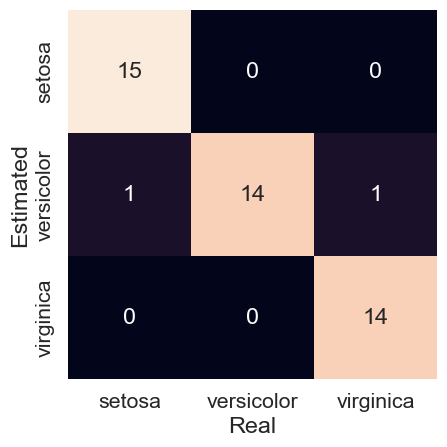

In [10]:
# Previewing classes with test samples.
prev_y = nsa.predict(test_x)
# Showing the accuracy of predictions for actual data.
print(f"The accuracy is {accuracy_score(prev_y, test_y)}")
print(classification_report(test_y, prev_y))
# Generating the confusion matrix and plotting it graphically.
mat = confusion_matrix(y_true=test_y, y_pred=prev_y)
sns.set(font_scale=1.4) 
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=nsa.classes, yticklabels=nsa.classes)
plt.xlabel('Real')
plt.ylabel('Estimated')
plt.show()